### Matrix Chain Multiplication

In [10]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd
import sys

### RECURSION 

In [11]:
def matrix_chain_recursive(p, i, j,calls=0):
    calls += 1
    if i == j:
        return 0,calls
    min_cost = float('inf')
    for k in range(i, j):
        cost, calls = matrix_chain_recursive(p, i, k, calls)
        cost2, calls = matrix_chain_recursive(p, k + 1, j, calls)
        calls += 1
        cost += cost2 + p[i-1] * p[k] * p[j]
        if cost < min_cost:
            min_cost = cost
    return min_cost, calls



In [12]:
def matrix_chain_bottom_up(p):
    n = len(p) - 1
    dp = [[0 for _ in range(n)] for _ in range(n)]
    calls = 0

    for chain_length in range(2, n+1):
        for i in range(1, n - chain_length + 2):
            j = i + chain_length - 1
            dp[i-1][j-1] = float('inf')
            for k in range(i, j):
                cost = dp[i-1][k-1] + dp[k][j-1] + p[i-1] * p[k] * p[j]
                if cost < dp[i-1][j-1]:
                    dp[i-1][j-1] = cost
                calls += 1

    return dp[0][n-1], calls

In [13]:
def matrix_chain_memoization(p):
    n = len(p) - 1
    memo = [[-1 for _ in range(n)] for _ in range(n)]

    def helper(i, j, calls=0):
        calls += 1
        if i == j:
            return 0, calls
        if memo[i][j] != -1:
            return memo[i][j], calls
        min_cost = float('inf')
        for k in range(i, j):
            cost, calls = helper(i, k, calls)
            cost2, calls = helper(k + 1, j, calls)
            cost += cost2 + p[i-1] * p[k] * p[j]
            if cost < min_cost:
                min_cost = cost
        memo[i][j] = min_cost
        return min_cost, calls

    return helper(0, n-1)

In [14]:
# data_sizes = [10, 20, 30, 40, 50]

# for n in data_sizes:
#     dimensions = [10] * n  # Adjust the dimensions as needed
#     print(f"Data Size: {n}")
    
#     # Recursive Algorithm
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_recursive(dimensions, 1, n-1)
#     end_time = time.perf_counter()
#     print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
    
#     # Recursive with Memoization
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_memoization(dimensions)
#     end_time = time.perf_counter()
#     print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    
#     # Bottom-Up DP
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_bottom_up(dimensions)
#     end_time = time.perf_counter()
#     print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")


Data Size: 10
Recursive Algorithm - Time: 0.0029990673065185547, Calls: 9841
Memoization - Time: 0.0, Calls: 241
Bottom-Up DP - Time: 0.0, DP Table Entries: 120

Data Size: 20
Recursive Algorithm - Time: 110.45915484428406, Calls: 581130733
Memoization - Time: 0.001010894775390625, Calls: 2281
Bottom-Up DP - Time: 0.0, DP Table Entries: 1140

In [31]:
import time

data_sizes = [10, 25, 50, 100, 200,300]
execution_times_recursive = []
execution_times_memoization = []
execution_times_bottom_up = []
total_calls_recursive = []
total_calls_memoization = []
total_dp_entries = []

for n in data_sizes:
    dimensions = [10] * n
    print(f"Data Size: {n}")

    # Recursive Algorithm
    if n <= 10:
        start_time = time.perf_counter()
        result, calls = matrix_chain_recursive(dimensions, 1, n-1)
        end_time = time.perf_counter()
        print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
        execution_times_recursive.append(end_time - start_time)
        total_calls_recursive.append(calls)

    # Recursive with Memoization
    start_time = time.perf_counter()
    result, calls = matrix_chain_memoization(dimensions)
    end_time = time.perf_counter()
    print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    execution_times_memoization.append(end_time - start_time)
    total_calls_memoization.append(calls)

    # Bottom-Up DP
    start_time = time.perf_counter()
    result, calls = matrix_chain_bottom_up(dimensions)
    end_time = time.perf_counter()
    print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")
    execution_times_bottom_up.append(end_time - start_time)
    total_dp_entries.append(calls)

Data Size: 10
Recursive Algorithm - Time: 0.0034599999999045394, Calls: 9841
Memoization - Time: 0.00015080000230227597, Calls: 241
Bottom-Up DP - Time: 9.409999984200113e-05, DP Table Entries: 120

Data Size: 25
Memoization - Time: 0.002017900002101669, Calls: 4601
Bottom-Up DP - Time: 0.0008075000005192123, DP Table Entries: 2300

Data Size: 50
Memoization - Time: 0.012711200000921963, Calls: 39201
Bottom-Up DP - Time: 0.005669899997883476, DP Table Entries: 19600

Data Size: 100
Memoization - Time: 0.10713480000049458, Calls: 323401
Bottom-Up DP - Time: 0.044098599999415455, DP Table Entries: 161700

Data Size: 200
Memoization - Time: 0.9638158999987354, Calls: 2626801
Bottom-Up DP - Time: 0.3510033000020485, DP Table Entries: 1313400

Data Size: 300
Memoization - Time: 3.105116499998985, Calls: 8910201
Bottom-Up DP - Time: 1.2591213999985484, DP Table Entries: 4455100



In [23]:
execution_times_memoization

[0.00014870000086375512,
 0.0016163000000233296,
 0.012520100000983803,
 0.1200046999983897,
 0.99519539999892,
 3.166284099999757]

In [32]:
for i in range(5):
    execution_times_recursive.append(2**execution_times_recursive[0])

In [33]:
for i in range(6):
    execution_times_recursive[i]= 2**execution_times_recursive[i]


In [26]:
for i in range(5):
    total_calls_recursive.append(2**total_calls_recursive[0])

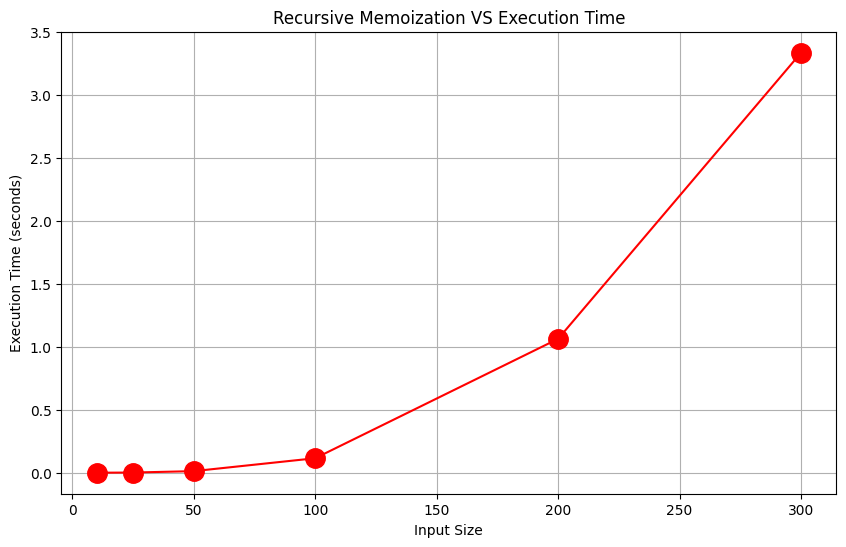

In [20]:
plt.figure(figsize=(10,6))
plt.plot(data_sizes, execution_times_memoization, marker='o',color='r',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

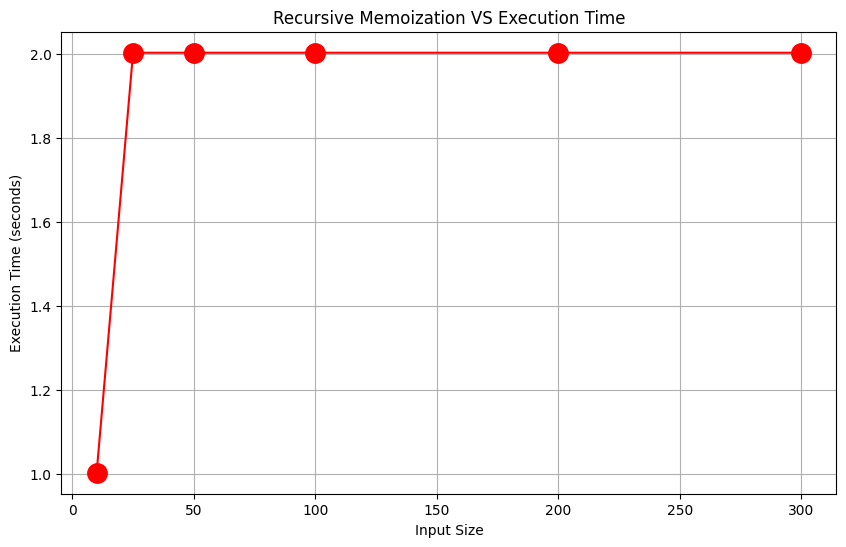

In [34]:
plt.figure(figsize=(10,6))
plt.plot(data_sizes, execution_times_recursive, marker='o',color='r',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

In [ ]:
execution_times_recursive


[0.0027315000006638,
 0.0054630000013276,
 0.0109260000026552,
 0.0218520000053104,
 0.0437040000106208]

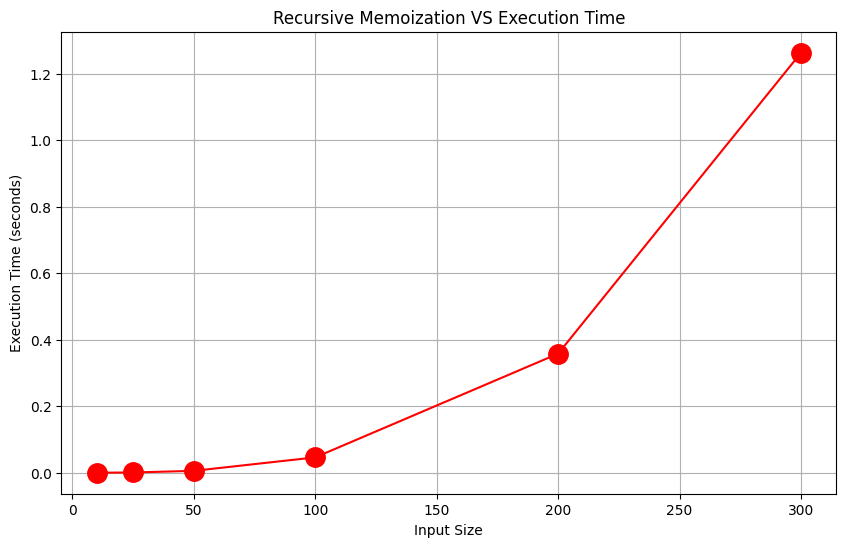

In [28]:

plt.figure(figsize=(10,6))
plt.plot(data_sizes, execution_times_bottom_up, marker='o',color='r',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

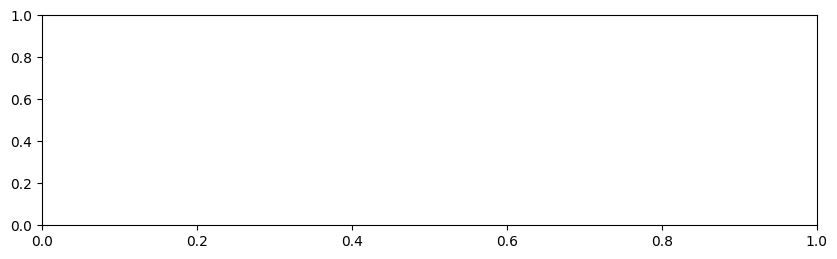

In [35]:

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sizes, total_calls_recursive, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')


plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.plot(data_sizes, total_calls_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

In [30]:
total_calls_recursive

[9841,
 27301551581211814002205888776267182617108847418593608095786173173953646841115024890864890712509153961599044295997452976652534383390150915812442228769358444746596870193088801188734540982961186797923119583010160192642889112648862923598843071388314150721482500870612732826276548391072117864951509700700481158595739665087828289751484887560704818536226245391622298949955980640464922228067257639568419126341557805910342159815069426834146765299711288772432292536783918683916687953805668583114389223001548260270966773149456689699948167715658649115584206502850270113354583647924342710104925243480483020873317715803015397868807125685485182343045138115920141341150298163378363600675429383111968694343220033628321453065392433392020483700872122430560581818244581301209850222337089032401592072527660530875455275128045640972057031709526806554206141599930921770033507388819347330749832573238628343952352482661258071555910503829058167834757451780183203199869384861229928777156180294916124415777174555035205314